In [1]:
import math
import cv2
import numpy as np 
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils

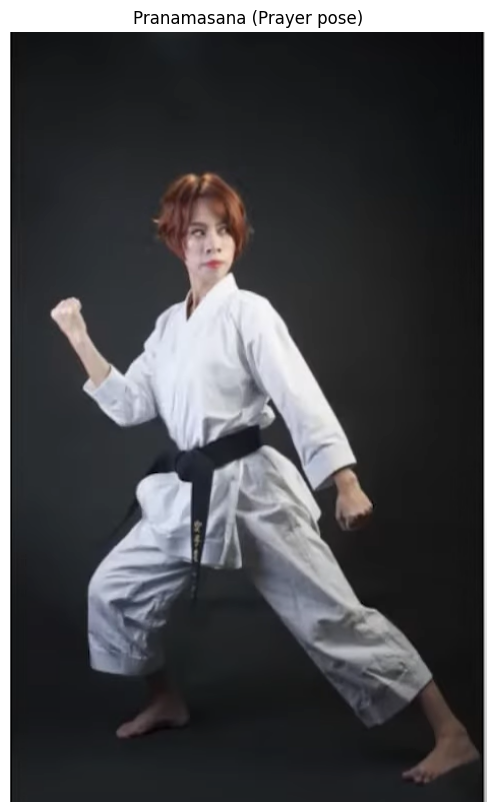

In [3]:
sample_img = cv2.imread("sample.png")
plt.figure(figsize=(10,10))
plt.title("Pranamasana (Prayer pose)")
plt.axis("off")
plt.imshow(sample_img[:,:,::-1])
plt.show()


In [4]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
    for i in range(33): # all 33 landmarks
        print(f'{mp_pose.PoseLandmark(i).name} : {results.pose_landmarks.landmark[i]}')

NOSE : x: 0.41704363
y: 0.27792144
z: -0.81798637
visibility: 1.0

LEFT_EYE_INNER : x: 0.42886782
y: 0.25987914
z: -0.78091455
visibility: 1.0

LEFT_EYE : x: 0.4439677
y: 0.2589552
z: -0.7817626
visibility: 1.0

LEFT_EYE_OUTER : x: 0.4544579
y: 0.25825676
z: -0.78150755
visibility: 1.0

RIGHT_EYE_INNER : x: 0.39292112
y: 0.26118633
z: -0.7378229
visibility: 1.0

RIGHT_EYE : x: 0.3815694
y: 0.2620433
z: -0.7384666
visibility: 0.9999999

RIGHT_EYE_OUTER : x: 0.37076536
y: 0.26295626
z: -0.73866403
visibility: 0.9999999

LEFT_EAR : x: 0.46604812
y: 0.26591706
z: -0.52699524
visibility: 1.0

RIGHT_EAR : x: 0.35284314
y: 0.2719686
z: -0.32626134
visibility: 0.9999994

MOUTH_LEFT : x: 0.4416291
y: 0.2934818
z: -0.7162786
visibility: 0.99999976

MOUTH_RIGHT : x: 0.39918166
y: 0.2953492
z: -0.66364306
visibility: 0.9999995

LEFT_SHOULDER : x: 0.5114557
y: 0.36527592
z: -0.5242953
visibility: 0.9999988

RIGHT_SHOULDER : x: 0.33794844
y: 0.3869161
z: 0.12367251
visibility: 0.999884

LEFT_ELBOW :

In [5]:
image_height, image_width, _ = sample_img.shape
if results.pose_landmarks:
    for i in range(33):
        print(f'mp_pose.PoseLandmark(i).name : {mp_pose.PoseLandmark(i).name}')
        print(f'x : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility : {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}')

mp_pose.PoseLandmark(i).name : NOSE
x : 195.5934607386589
y : 210.66445016860962
z : -383.63560712337494
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE_INNER
x : 201.1390061378479
y : 196.98838967084885
z : -366.2489216327667
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE
x : 208.2208513021469
y : 196.28804951906204
z : -366.64665937423706
visibility : 1.0
mp_pose.PoseLandmark(i).name : LEFT_EYE_OUTER
x : 213.14075925946236
y : 195.7586265206337
z : -366.5270417332649
visibility : 1.0
mp_pose.PoseLandmark(i).name : RIGHT_EYE_INNER
x : 184.28000524640083
y : 197.97923928499222
z : -346.0389355421066
visibility : 1.0
mp_pose.PoseLandmark(i).name : RIGHT_EYE
x : 178.95604181289673
y : 198.62881934642792
z : -346.34084498882294
visibility : 0.9999998807907104
mp_pose.PoseLandmark(i).name : RIGHT_EYE_OUTER
x : 173.88895300030708
y : 199.3208463191986
z : -346.4334305524826
visibility : 0.9999998807907104
mp_pose.PoseLandmark(i).name : LEFT_EAR
x : 218.5765689611435
y : 2

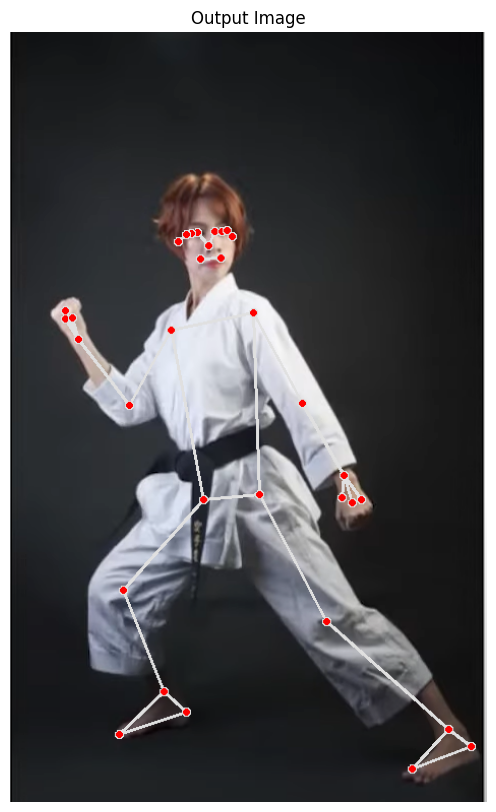

In [6]:
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image = sample_img, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize=(10,10))
    plt.title("Output Image")
    plt.axis("off")
    plt.imshow(sample_img[:,:,::-1])
    plt.show()

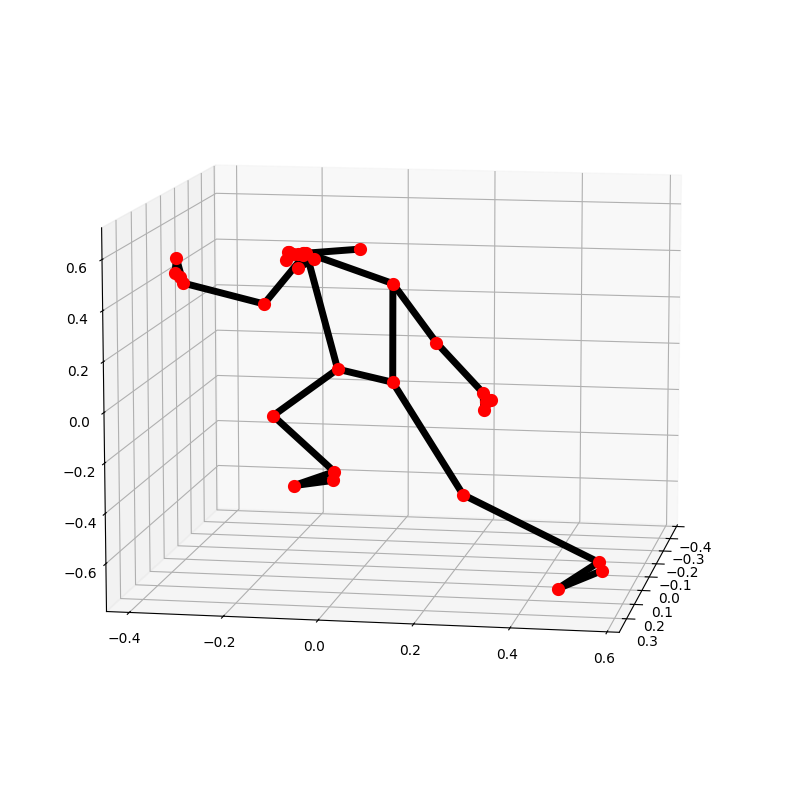

In [7]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
def calculate_angle(landmark1, landmark2, landmark3):
    a = np.array(landmark1)
    b = np.array(landmark2)
    c = np.array(landmark3)
    ba = a - b
    bc = c - b
    ba_norm = ba / np.linalg.norm(ba)
    bc_norm = bc / np.linalg.norm(bc)
    cosine_angle = np.dot(ba_norm, bc_norm)
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

In [18]:
def calculate_angle_2d(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360
    return angle

In [ ]:
def checkTreePose(landmarks, output_image, display=False):
    pose = "Unknown Pose"
    color = (0,0,255)
    left_knee_angle = calculate_angle_2d(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    right_knee_angle = calculate_angle_2d(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    # check for tree pose
    if left_knee_angle > 165 and left_knee_angle < 195:
        if (right_knee_angle > 25 and right_knee_angle < 45) or (right_knee_angle > 315 and right_knee_angle < 335):
            pose = "Tree Pose"
    if right_knee_angle > 165 and right_knee_angle < 195:
        if (left_knee_angle > 25 and left_knee_angle < 45) or (left_knee_angle > 315 and left_knee_angle < 335):
            pose = "Correct Tree Pose"
    if(pose!="Not a Tree Pose"):
        color = (0,255,0)
    cv2.putText(output_image, pose, (10,30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    if display:
        plt.figure(figsize=[10,10])
        plt.title("Output Image")
        plt.axis("off")
        plt.imshow(output_image[:,:,::-1])
        plt.show()
        print(left_knee_angle, right_knee_angle)
    else:
        return output_image, pose

In [30]:
def detectPose(image, pose, display=True):
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    height, width, _ = image.shape
    landmarks = []
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),(landmark.z * width)))
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("Original Image")
        plt.axis("off")
        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis("off")
        plt.show()
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    else:
        return output_image, landmarks

DEBUG:
Left Elbow Angle: 148.40
Right Elbow Angle: 101.21
Left Shoulder Angle: 62.94
Right Shoulder Angle: 56.53
Wrist Distance: 293.39
Wrist Y Diff: 134
Left Shoulder Y: 276
Left Elbow Y: 365
Left Wrist Y: 436
Mid Chest Y: 320.5
Tolerance: 53.06
Wrists at Chest Level: False
Left Shoulder: (239, 276, -245.89448183774948)
Left Elbow: (287, 365, -288.7995601296425)
Left Wrist: (328, 436, -404.02332842350006)
Right Shoulder: (158, 293, 58.00240611284971)
Right Elbow: (117, 367, 26.358794786036015)
Right Wrist: (67, 302, -188.36544108390808)


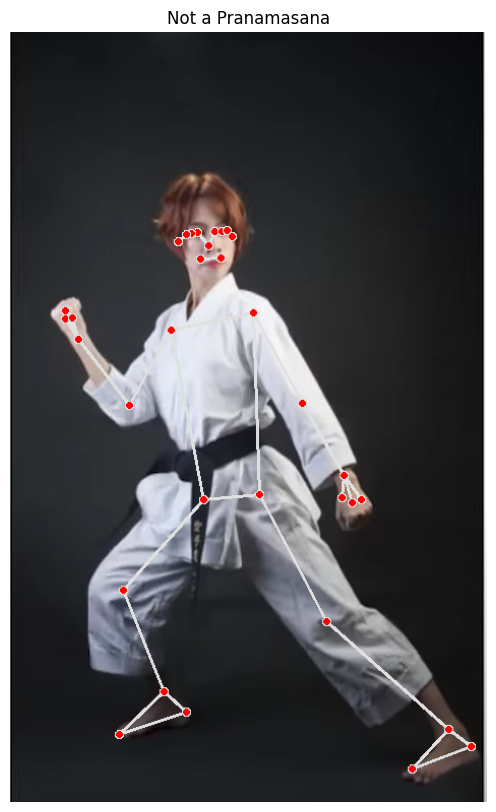

In [ ]:
image = cv2.imread("sample.png")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkTreePose(landmarks, output_image, display=True)

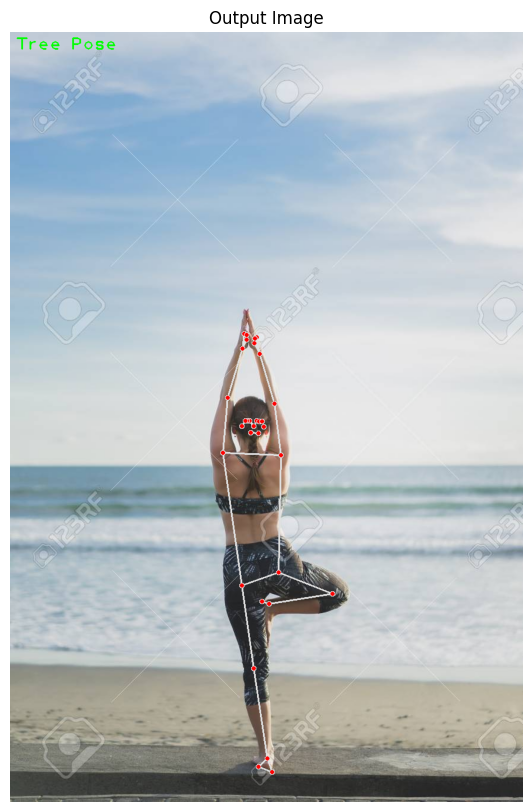

179.52562076106335 329.3884178075153


In [75]:
image = cv2.imread("tree.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkTreePose(landmarks, output_image, display=True)

In [78]:
def checkPranamasana(landmarks, output_image, display=False):
    pose = "Not a Pranamasana"
    color = (0, 0, 255)

    def lm(index):
        return landmarks[index]

    # Calculate joint angles
    left_elbow_angle = calculate_angle(lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                       lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
                                       lm(mp_pose.PoseLandmark.LEFT_WRIST.value))
    right_elbow_angle = calculate_angle(lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
                                        lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
                                        lm(mp_pose.PoseLandmark.RIGHT_WRIST.value))
    left_shoulder_angle = calculate_angle(lm(mp_pose.PoseLandmark.LEFT_ELBOW.value),
                                          lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value),
                                          lm(mp_pose.PoseLandmark.LEFT_HIP.value))
    right_shoulder_angle = calculate_angle(lm(mp_pose.PoseLandmark.RIGHT_ELBOW.value),
                                           lm(mp_pose.PoseLandmark.RIGHT_SHOULDER.value),
                                           lm(mp_pose.PoseLandmark.RIGHT_HIP.value))

    # Wrist positions
    left_wrist = lm(mp_pose.PoseLandmark.LEFT_WRIST.value)
    right_wrist = lm(mp_pose.PoseLandmark.RIGHT_WRIST.value)

    # Calculate wrist distance and vertical alignment
    wrist_distance = ((left_wrist[0] - right_wrist[0]) ** 2 + (left_wrist[1] - right_wrist[1]) ** 2) ** 0.5
    wrist_y_diff = abs(left_wrist[1] - right_wrist[1])

    # Shoulder and elbow Y (used for chest level check)
    left_shoulder_y = lm(mp_pose.PoseLandmark.LEFT_SHOULDER.value)[1]
    left_elbow_y = lm(mp_pose.PoseLandmark.LEFT_ELBOW.value)[1]

    # Compute image height
    image_height, _, _ = output_image.shape
    tolerance = image_height * 0.07  # ~7% of image height

    # Mid-chest level Y
    mid_chest_y = (left_shoulder_y + left_elbow_y) / 2
    wrists_at_chest_level = abs(left_wrist[1] - mid_chest_y) <= tolerance

    # Final pose decision
    if(left_elbow_angle>180):
        left_elbow_angle = 360 - left_elbow_angle
    if(right_elbow_angle>180):
        right_elbow_angle = 360 - right_elbow_angle
    if(left_shoulder_angle>180):
        left_shoulder_angle = 360 - left_shoulder_angle
    if(right_shoulder_angle>180):
        right_shoulder_angle = 360 - right_shoulder_angle
    if (
        75 <= left_elbow_angle <= 90 and
        75 <= right_elbow_angle <= 90 and
        30 <= left_shoulder_angle <= 60 and
        30 <= right_shoulder_angle <= 60 and
        wrist_distance < 50 and
        wrist_y_diff < 20 and
        wrists_at_chest_level
    ):
        pose = "Pranamasana (Prayer pose)"
        color = (0, 255, 0)
    # Show final output
    print("DEBUG:")
    print(f"Left Elbow Angle: {left_elbow_angle:.2f}")
    print(f"Right Elbow Angle: {right_elbow_angle:.2f}")
    print(f"Left Shoulder Angle: {left_shoulder_angle:.2f}")
    print(f"Right Shoulder Angle: {right_shoulder_angle:.2f}")
    print(f"Wrist Distance: {wrist_distance:.2f}")
    print(f"Wrist Y Diff: {wrist_y_diff}")
    print(f"Left Shoulder Y: {left_shoulder_y}")
    print(f"Left Elbow Y: {left_elbow_y}")
    print(f"Left Wrist Y: {left_wrist[1]}")
    print(f"Mid Chest Y: {mid_chest_y}")
    print(f"Tolerance: {tolerance}")
    print(f"Wrists at Chest Level: {wrists_at_chest_level}")
    print(f"Left Shoulder: {landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]}")
    print(f"Left Elbow: {landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]}")
    print(f"Left Wrist: {landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]}")
    print(f"Right Shoulder: {landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]}")
    print(f"Right Elbow: {landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]}")
    print(f"Right Wrist: {landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]}")
    if display:
        plt.figure(figsize=[10, 10])
        plt.title(pose)
        plt.axis("off")
        plt.imshow(output_image[:, :, ::-1])
        plt.show()

    return pose


DEBUG:
Left Elbow Angle: 82.22
Right Elbow Angle: 78.89
Left Shoulder Angle: 36.02
Right Shoulder Angle: 31.79
Wrist Distance: 17.26
Wrist Y Diff: 3
Left Shoulder Y: 122
Left Elbow Y: 194
Left Wrist Y: 197
Mid Chest Y: 158.0
Tolerance: 25.200000000000003
Wrists at Chest Level: False
Left Shoulder: (336, 122, 77.18470305204391)
Left Elbow: (381, 194, 39.92515057325363)
Left Wrist: (290, 197, -26.27503551542759)
Right Shoulder: (229, 121, 62.18193992972374)
Right Elbow: (188, 203, 10.682457648217678)
Right Wrist: (273, 194, -33.464749082922935)


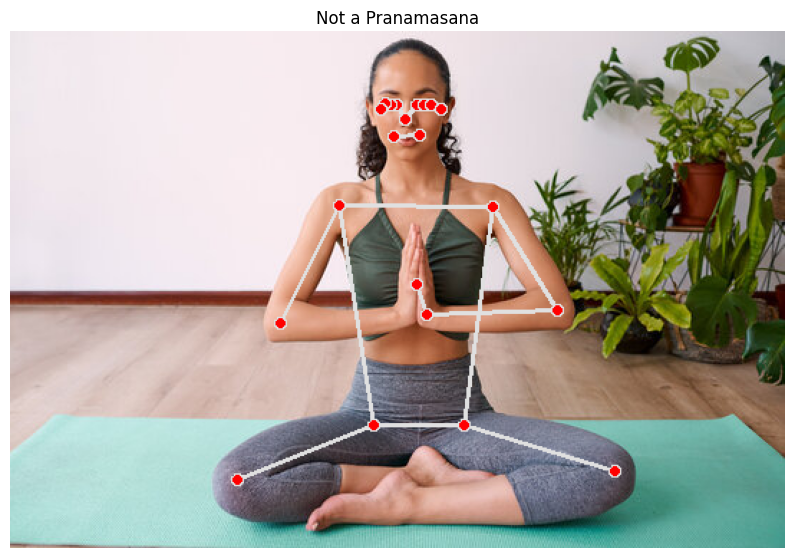

In [79]:
image = cv2.imread("SuryaNamaskar_Steps/1. Pranamasana (Prayer pose)/a.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkPranamasana(landmarks, output_image, display=True)

DEBUG:
Left Elbow Angle: 137.35
Right Elbow Angle: 129.40
Left Shoulder Angle: 35.50
Right Shoulder Angle: 45.44
Wrist Distance: 17.00
Wrist Y Diff: 0
Left Shoulder Y: 201
Left Elbow Y: 253
Left Wrist Y: 243
Mid Chest Y: 227.0
Tolerance: 39.34
Wrists at Chest Level: True
Left Shoulder: (109, 201, 77.96892710030079)
Left Elbow: (125, 253, 10.85838326252997)
Left Wrist: (113, 243, -199.2461308836937)
Right Shoulder: (53, 202, -27.56725251674652)
Right Elbow: (52, 265, -106.92630708217621)
Right Wrist: (96, 243, -239.66051638126373)


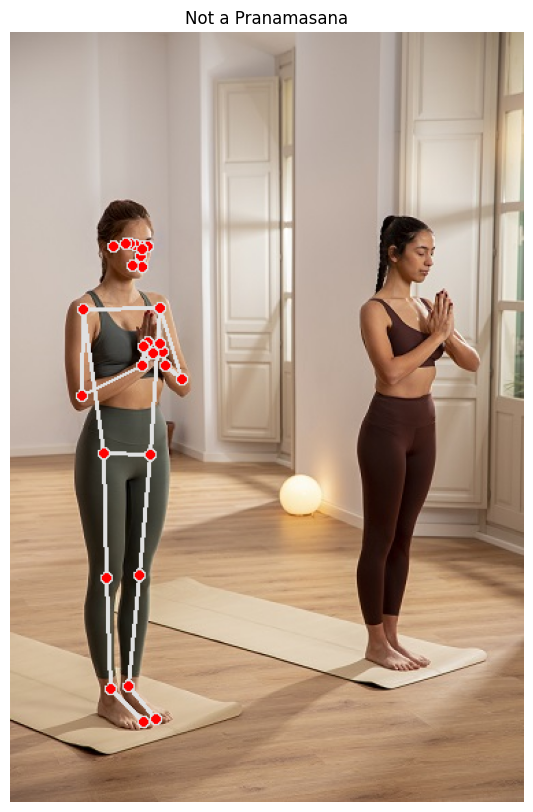

In [80]:
image = cv2.imread("SuryaNamaskar_Steps/1. Pranamasana (Prayer pose)/b.jpg")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    checkPranamasana(landmarks, output_image, display=True)